# Simple Linear Regression

- $\text{Hypothesis Function}$
$$ h_\Theta(x) = \Theta_0 + \Theta_1x = \Theta^T X$$

- $\text{Parameters}$
$$ \Theta_0, \Theta_1 $$

- $\text{Cost Function}$
$$J(\Theta_0, \Theta_1) = \frac{1}{2m}\sum_{i = 1}^{m}(h_\Theta(x^{(i)}) - y^{(i)})^2 $$

- $\text{Optimization Goal}$
$$\underset{\Theta_0, \Theta_1}{min} \quad J(\Theta_0, \Theta_1) $$

- $\text{Gradient Descent}$
$\text{repeat until convergence}$ {
$$ \Theta_0 := \Theta_0 - \alpha \frac{1}{m}\sum_{i = 1}^{m}(h_\Theta(x^{(i)}) - y^{(i)})x_0^{(i)} $$

$$ \Theta_1 := \Theta_1 - \alpha \frac{1}{m}\sum_{i = 1}^{m}(h_\Theta(x^{(i)}) - y^{(i)})x_1^{(i)} $$
$$\text{( Simultaneously update } \Theta_0 \text{ and } \Theta_1 \text{ )}$$

}

## Import Libraries

In [149]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import metrics


## Import CSV File

In [150]:
data = pd.read_csv("./USA_Students.csv")
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


## Extract featrue and label from the data

In [151]:
m = np.array(data["SAT"]).size
tmp = np.array(data["SAT"]).reshape(m, 1)

ones_col = np.ones((m, 1))
X_matrix = np.concatenate((ones_col, tmp ), axis = 1)


Y = np.array(data["GPA"]).reshape((m, 1))
X = np.array(data["SAT"]).reshape((m, 1))

## Visualize Data

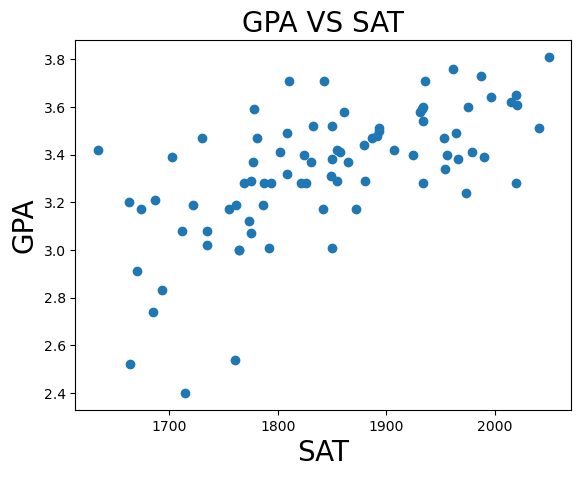

In [152]:
plt.scatter(X, Y)
plt.title("GPA VS SAT", fontsize=20)
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)

plt.show()

## Gradient Descent

In [153]:
epochs = 100
alpha = 0.0000001
theta = np.array([[0.0], [0.0]]) # parameter vector
h_theta = []


for i in range(epochs):

    Yd = np.dot(X_matrix, theta) # y predicted

    d0 = np.sum(Yd - Y) # partial derivative of J(th0, th1) with respect to theta0
    d1 = np.sum((Yd - Y) * X) # partial derivative of J(th0, th1) with respect to theta1

    tmp0 = theta[0][0] - (alpha * (1 / m)) *  d0
    tmp1 = theta[1][0] - (alpha * (1 / m)) *  d1

    theta[0][0] = tmp0
    theta[1][0] = tmp1
    

## Prediction

In [154]:
Ypred = np.dot(X_matrix, theta)

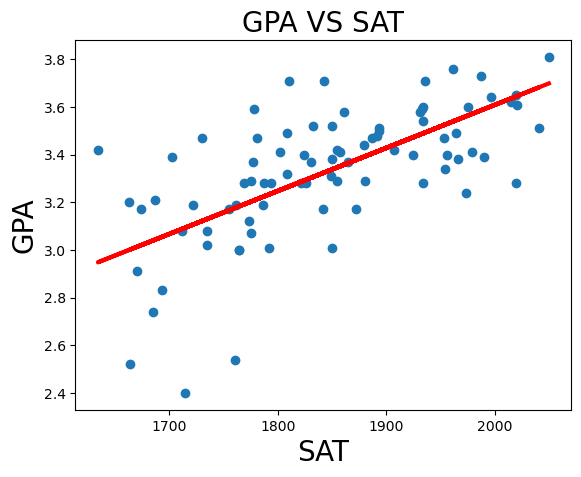

In [155]:
plt.scatter(X, Y)
plt.title("GPA VS SAT", fontsize=20)
plt.xlabel("SAT", fontsize=20)
plt.ylabel("GPA", fontsize=20)
plt.plot(X, Ypred, color='red', linewidth = 3)

plt.show()

## Model Evaluation

In [161]:
print(f"Mean Square Error = {round(metrics.mean_squared_error(Y, Ypred), 4)}")

Mean Square Error = 0.0435
